<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/01.%20Week%201/Assignment/02_Week_1_Classification_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Pytorch dan Tensorflow**

In [1]:
# !pip install tensorflow
# !pip install torch torchvision

## **Import Library**

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from imblearn.over_sampling import SMOTE

## **DATA EXPLORING**

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [32]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [33]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [34]:
df['income'] = df['income'].astype(str).str.replace('.', '')

In [35]:
label = LabelEncoder()
df = df.apply(label.fit_transform)

In [36]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.016248,-0.078902,-0.015058,0.030940,-0.263978,-0.014721,-0.263383,0.028421,0.088120,0.126027,0.062223,0.071637,-0.002516,0.230369
workclass,0.016248,1.000000,-0.024255,0.015664,0.015436,-0.021336,0.291224,-0.047994,0.043965,0.058775,0.009899,0.010077,0.052453,0.001600,0.006258
fnlwgt,-0.078902,-0.024255,1.000000,-0.019959,-0.037765,0.031083,-0.001169,0.007378,-0.012369,0.028302,-0.006651,-0.003616,-0.013077,-0.056929,-0.005881
education,-0.015058,0.015664,-0.019959,1.000000,0.359668,-0.037417,-0.021515,-0.010758,0.013250,-0.027041,0.032601,0.016944,0.058070,0.066181,0.080091
education-num,0.030940,0.015436,-0.037765,0.359668,1.000000,-0.069992,0.087977,-0.090534,0.029239,0.009328,0.154481,0.084184,0.144799,0.062457,0.332613
marital-status,-0.263978,-0.021336,0.031083,-0.037417,-0.069992,1.000000,0.009486,0.187800,-0.070104,-0.127479,-0.075776,-0.034518,-0.186509,-0.019584,-0.199072
occupation,-0.014721,0.291224,-0.001169,-0.021515,0.087977,0.009486,1.000000,-0.051154,0.001504,0.057119,0.016424,0.014978,0.029455,-0.003213,0.049353
relationship,-0.263383,-0.047994,0.007378,-0.010758,-0.090534,0.187800,-0.051154,1.000000,-0.117041,-0.579797,-0.093409,-0.060441,-0.251573,-0.003897,-0.253214
race,0.028421,0.043965,-0.012369,0.013250,0.029239,-0.070104,0.001504,-0.117041,1.000000,0.086734,0.025255,0.019256,0.039935,0.130620,0.070934
sex,0.088120,0.058775,0.028302,-0.027041,0.009328,-0.127479,0.057119,-0.579797,0.086734,1.000000,0.076261,0.048981,0.229618,-0.008983,0.214628


In [37]:
df.duplicated().sum()

48

In [38]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48794 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48794 non-null  int64
 1   workclass       48794 non-null  int64
 2   fnlwgt          48794 non-null  int64
 3   education       48794 non-null  int64
 4   education-num   48794 non-null  int64
 5   marital-status  48794 non-null  int64
 6   occupation      48794 non-null  int64
 7   relationship    48794 non-null  int64
 8   race            48794 non-null  int64
 9   sex             48794 non-null  int64
 10  capital-gain    48794 non-null  int64
 11  capital-loss    48794 non-null  int64
 12  hours-per-week  48794 non-null  int64
 13  native-country  48794 non-null  int64
 14  income          48794 non-null  int64
dtypes: int64(15)
memory usage: 6.0 MB


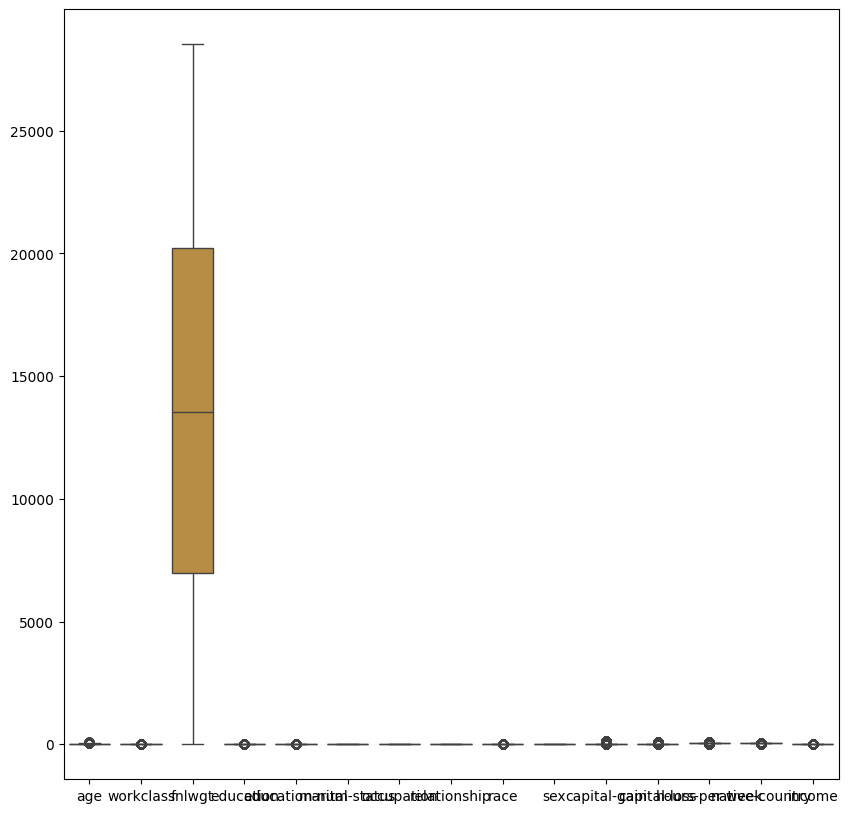

In [42]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()

## **Data Preparation**

In [43]:
X = df.select_dtypes(include=np.number).drop('income', axis=1)
y = df['income']

In [44]:
Counter(y)

Counter({0: 37113, 1: 11681})

In [45]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
y_scaler = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [49]:
X_train.shape

(59380, 14)

In [50]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [51]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

## **Tensorflow Model**

In [52]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [53]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy'
)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split= 0.15, callbacks=[early_stopping])

Epoch 1/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4050 - val_loss: 0.3383
Epoch 2/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3363 - val_loss: 0.3309
Epoch 3/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3221 - val_loss: 0.3162
Epoch 4/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3137 - val_loss: 0.3148
Epoch 5/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3020 - val_loss: 0.3019
Epoch 6/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2961 - val_loss: 0.2947
Epoch 7/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2889 - val_loss: 0.2919
Epoch 8/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2765 - val_loss: 0.2866
Epoch 9/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2761 - val_loss: 0.2819
Epoch 10/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2753 - val_loss: 0.2777
Epoch 11/100
1578/1578 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2666 - val_loss: 0.2758
Epoch 12/100
1578/1

In [54]:
y_test.min(), y_test.max()

(0, 1)

464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8727
Precision: 0.8580
Recall: 0.8921
F1-score: 0.8748
AUC: 0.9534


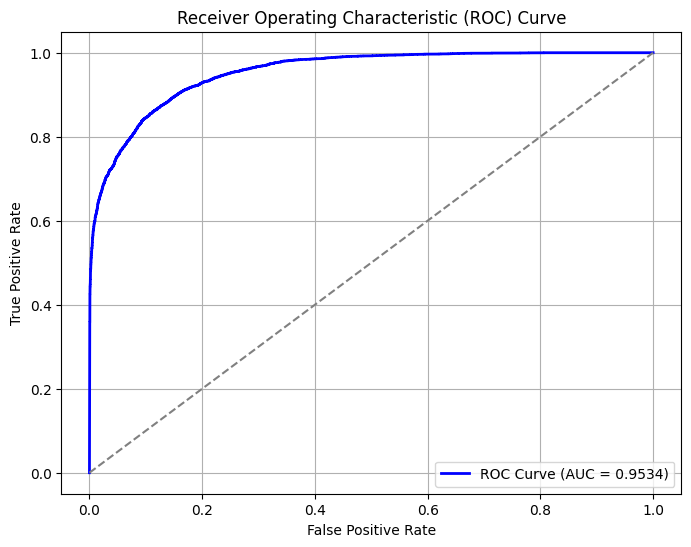

In [55]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## **Pytorch Model**

In [56]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [57]:
class SimpleNN(nn.Module):
    def __init__(self,input):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [58]:
model = SimpleNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
y_preds = []
y_actuals = []

for epoch in range(100):
    # Training phase
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch.view(-1, 1))

    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch.view(-1, 1))

        # Simpan hasil prediksi
        y_preds.extend(val_outputs.detach().numpy().flatten())
        y_actuals.extend(y_test_torch.numpy().flatten())

    # Cetak loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print("PyTorch model training complete!")


Epoch 0, Training Loss: 0.7214475870132446, Validation Loss: 0.7168533802032471
Epoch 10, Training Loss: 0.6747810244560242, Validation Loss: 0.670945942401886
Epoch 20, Training Loss: 0.6358629465103149, Validation Loss: 0.6326160430908203
Epoch 30, Training Loss: 0.6029136776924133, Validation Loss: 0.600125789642334
Epoch 40, Training Loss: 0.5744274258613586, Validation Loss: 0.5720624923706055
Epoch 50, Training Loss: 0.5497294068336487, Validation Loss: 0.5478178262710571
Epoch 60, Training Loss: 0.5286165475845337, Validation Loss: 0.5271977782249451
Epoch 70, Training Loss: 0.510851263999939, Validation Loss: 0.5099258422851562
Epoch 80, Training Loss: 0.49603766202926636, Validation Loss: 0.4955569803714752
Epoch 90, Training Loss: 0.48368197679519653, Validation Loss: 0.48356664180755615
PyTorch model training complete!


In [60]:
y_test_torch.min(), y_test_torch.max()

(tensor(0.), tensor(1.))

Accuracy: 0.7766
Precision: 0.7567
Recall: 0.8133
F1-score: 0.7840
AUC: 0.8569


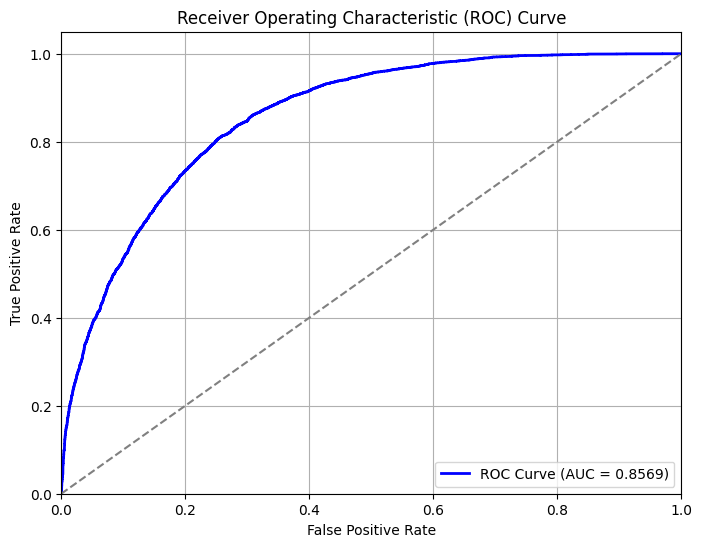

In [61]:
from sklearn.metrics import roc_curve

model.eval()

with torch.no_grad():
    y_pred_probs = model(X_test_torch).cpu().numpy()  # Konversi ke NumPy

# Konversi probabilitas ke label biner
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluasi model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

# Print hasil evaluasi
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Hitung ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **Persamaan Matematika Digunakan**

### **1. Accuracy**

Akurasi ini digunakan untuk mengukur seberapa besar porsi prediksi yang benar terhadap keseluruhan sampelnya.

Bentuk persamaannya :

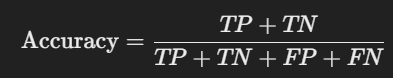


*   TP (True Positive): Prediksi positif yang benar
*   TN (True Negative): Prediksi negatif yang benar
*   FP (False Positive): Prediksi positif yang salah
*   FN (False Negative): Prediksi negatif yang salah

### **2. Precision**

Presisi ini mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

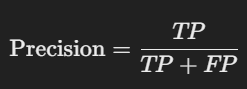

Maka, nilai presisi ini berguna untuk :


*   Nilai presisi tinggi berarti model jarang membuat kesalahan dengan mengklasifikasikan negatif sebagai positif (false positives).
*   Berguna saat false positive memiliki dampak besar





### **3. Recall**

Recall mengukur seberapa baik model menangkap semua kasus positif yang sebenarnya

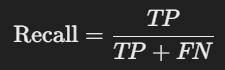

Dengan adanya recall, ini berarti model jarang melewatkan kelas positif yang sebenarnya (false negatives rendah).




### **4. F1-Score**

F1-score adalah rata-rata harmonik antara Presisi dan Recall.

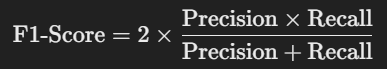

*   F1-Score ini berguna ketika dataset tidak seimbang (misalnya jumlah sampel positif jauh lebih sedikit dari negatif).
*   Nilai F1-score tinggi berarti keseimbangan presisi dan recall yang baik.
*   Salah satu cara untuk menyeimbangkan presisi dan recall adalah dengan F1-Score

**Jika F1-Score tinggi, berarti model memiliki keseimbangan presisi dan recall yang baik!**

### **5. AUC**

AUC adalah luas di bawah kurva ROC, yang mengukur kemampuan model untuk membedakan antara kelas positif dan negatif.

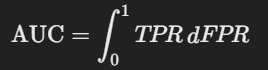


*   AUC = 1.0 → Model sempurna
*   AUC = 0.5 → Model seburuk tebakan acak
*   AUC < 0.5 → Model lebih buruk dari tebakan acak

### **6. ROC Curve**

ROC kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai threshold.

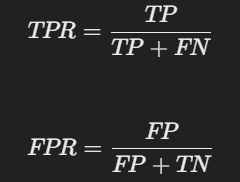

Kurva ROC menggambarkan trade-off antara Recall (TPR) dan False Positives (FPR)